# Project RDB & SQL - SE/DE Batch 2 Pacmann
- Task      : Creating Dummy Data
- Author    : Muhammad Ilham

In [ ]:
# # Install required library
# pip install Faker
# pip install pandas

In [ ]:
#Import Library
import pandas as pd
from faker import Faker
import random as rd

#Create fake class with locale Indonesia
fake = Faker('id_ID')

## Creating Dummy Data : Cars Table

Field required as below :

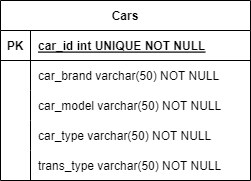

In [ ]:
#Import existing dummy data from github
URL = 'https://raw.githubusercontent.com/ilham-muhammad/Used-Car-Website-Database/main/cars_2023.csv'

data = pd.read_csv(URL)
data.sample(10)

In [ ]:
#Creating required field for Cars Table
field_name = ['car_id', 'car_brand', 'car_model', 'car_type', 'trans_type']

cars_csv = pd.DataFrame(columns = field_name)
cars_csv

In [ ]:
#Inserting data to each column using dummy data & faker
n_records = len(data)

cars_csv['car_id'] = [n for n in range(1,n_records+1)]
cars_csv['car_brand'] = data['make'].copy()
cars_csv['car_model'] = data['model'].copy()
cars_csv['car_type'] = data['body_styles1'].copy()
cars_csv['trans_type'] = [rd.choice(['Automatic', 'Manual']) for n in range(n_records)]

cars_csv

In [ ]:
#export data as cars.csv
cars_csv.to_csv('cars.csv', index=False)

## Creating Dummy Data : City Table

Field required as below :

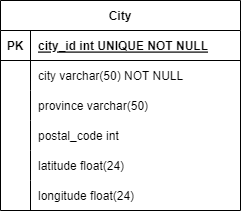

In [ ]:
#Import existing dummy data from github
URL = 'https://github.com/ilham-muhammad/Used-Car-Website-Database/raw/6536e04b346497a6a1a9aa468a12181026a7a874/city.xlsx'

data = pd.read_excel(URL)
data.head()

In [ ]:
#Creating required field for City Table
field_name = ['city_id', 'city', 'province', 'postal_code', 'latitude', 'longitude']

city_csv = pd.DataFrame(columns = field_name)
city_csv

In [ ]:
#Inserting data to each column using dummy data & faker
city_csv['city_id'] = data['kota_id'].copy().astype(int)
city_csv['city'] = data['nama_kota'].copy()
city_csv['province'] = [fake.state() for row in range(len(city_csv))]
city_csv['postal_code'] = [fake.postcode() for row in range(len(city_csv))]
city_csv['latitude'] = data['latitude'].copy()
city_csv['longitude'] = data['longitude'].copy()

city_csv

In [ ]:
#export data as city.csv
city_csv.to_csv('city.csv', index=False)

## Creating Dummy Data : Users Table

Field required as below :

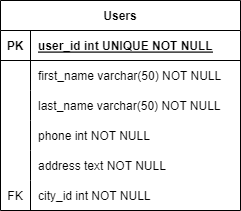

In [ ]:
#Creating required field for Users Table
field_name = ['user_id', 'first_name', 'last_name', 'phone', 'address', 'city_id']

users_csv = pd.DataFrame(columns = field_name)
users_csv

In [ ]:
#Inserting data to each column using dummy data & faker
n_records = 700

users_csv['user_id'] = [n for n in range(1, n_records+1)]
users_csv['first_name'] = [fake.first_name() for n in range(n_records)]
users_csv['last_name'] = [fake.last_name() for n in range(n_records)]
users_csv['phone'] = [fake.phone_number() for n in range(n_records)]
users_csv['address'] = [fake.street_address() for n in range(n_records)]
users_csv['city_id'] = [rd.choice(city_csv['city_id']) for n in range(n_records)]

users_csv

In [ ]:
#export data as users.csv
users_csv.to_csv('users.csv', index=False)

## Creating Dummy Data : Advertisements Table

Field required as below :

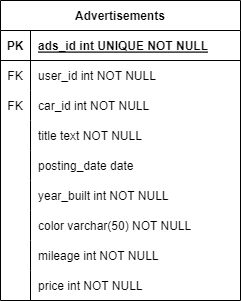

In [ ]:
#Creating required field for Advertisements Table
field_name = ['ads_id', 'user_id', 'car_id', 'title', 'posting_date', 'year_built', 'color', 'mileage', 'price']

ads_csv = pd.DataFrame(columns = field_name)
ads_csv

In [ ]:
#Inserting data to each column using dummy data & faker
n_records = 1000

ads_csv['ads_id'] = [n for n in range(1, n_records+1)]
ads_csv['user_id'] = [rd.choice(users_csv['user_id']) for n in range(n_records)]
ads_csv['car_id'] = [rd.choice(cars_csv['car_id']) for n in range(n_records)]
ads_csv['title'] = [rd.choice(['Jual mobil', 'Jual murah', 'Butuh uang', 'Jual mobil bagus', 'Jual mobil second', 'Jual cepat']) 
                    for n in range(n_records)]
ads_csv['posting_date'] = [fake.date() for n in range(n_records)]
ads_csv['year_built'] = [fake.year() for n in range(n_records)]
ads_csv['color'] = [fake.color_name() for n in range(n_records)]
ads_csv['mileage'] = [rd.randrange(0,200_000,100) for n in range(n_records)]
ads_csv['price'] = [rd.randrange(100_000_000,2_000_000_000,1_000_000) for n in range(n_records)]

ads_csv

In [ ]:
#export data as ads.csv
ads_csv.to_csv('ads.csv', index=False)

## Creating Dummy Data : Bids Table

Field required as below :

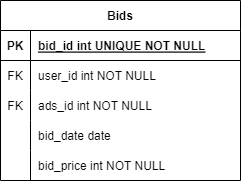

In [ ]:
#Creating required field for Bid Table
field_name = ['bid_id', 'user_id', 'ads_id', 'bid_date', 'bid_price']

bid_csv = pd.DataFrame(columns = field_name)
bid_csv

In [ ]:
#Inserting data to each column using dummy data & faker
n_records = 2000

bid_csv['bid_id'] = [n for n in range(1, n_records+1)]
bid_csv['user_id'] = [rd.choice(users_csv['user_id']) for n in range(n_records)]
bid_csv['ads_id'] = [rd.choice(ads_csv['ads_id']) for n in range(n_records)]
bid_csv['bid_date'] = [fake.date() for n in range(n_records)]
bid_csv['bid_price'] = [rd.randrange(100_000_000,2_000_000_000,1_000_000) for n in range(n_records)]

bid_csv

In [ ]:
#export data as bids.csv
bid_csv.to_csv('bids.csv', index=False)